In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def file2matrix(filename):
    with open(filename) as f:
        lines = f.readlines()
        size = len(lines)
        data = np.zeros((size, 3))
        labels = np.zeros(size, dtype=np.int8)
        for i in range(size):
            lines[i] = lines[i].strip().split('\t')
            data[i] = lines[i][:3]
            labels[i] = lines[i][3]
        return data, labels

In [3]:
data_file = '../dataset/datingTestSet2.txt'
data, labels = file2matrix(data_file)
print(data[:10])
print(labels[:10])

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 [7.5136000e+04 1.3147394e+01 4.2896400e-01]
 [3.8344000e+04 1.6697880e+00 1.3429600e-01]
 [7.2993000e+04 1.0141740e+01 1.0329550e+00]
 [3.5948000e+04 6.8307920e+00 1.2131920e+00]
 [4.2666000e+04 1.3276369e+01 5.4388000e-01]
 [6.7497000e+04 8.6315770e+00 7.4927800e-01]
 [3.5483000e+04 1.2273169e+01 1.5080530e+00]]
[3 2 1 1 1 1 3 3 1 3]


Text(0.5,0,'ice cream')

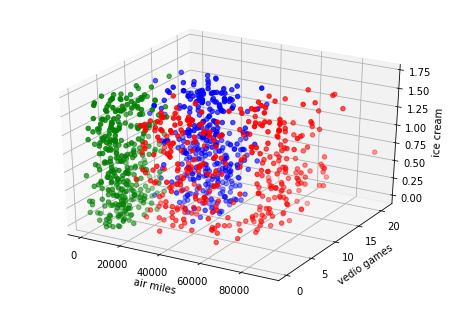

In [4]:
# Visualization
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
color = ['r', 'g', 'b']
for i in range(3):
    index = np.argwhere(labels==i+1).flatten()
    # print(index)
    ax.scatter(data[index,0],data[index,1],data[index,2],c=color[i])
ax.set_xlabel('air miles')
ax.set_ylabel('vedio games')
ax.set_zlabel('ice cream')

In [5]:
def autoNorm(data):
    _max = data.max(axis = 0)
    _min = data.min(axis = 0)
    _range = _max - _min
    norm_data = (data - _min)/ _range
    return norm_data

In [6]:
data = autoNorm(data)
print(data[:10])

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 [0.82320073 0.62848007 0.25248929]
 [0.42010233 0.07982027 0.0785783 ]
 [0.79972171 0.48480189 0.60896055]
 [0.39385141 0.32652986 0.71533516]
 [0.46745478 0.63464542 0.32031191]
 [0.73950675 0.41261212 0.44153637]
 [0.38875681 0.58668982 0.88936006]]


In [7]:
# Divide data set
def divideDataset(data, label, rate=0.1):
    bound = int(data.shape[0] * rate)
    test_data = data[:bound]
    test_label = label[:bound]
    eval_data = data[bound:]
    eval_label = label[bound:]
    return test_data, test_label, eval_data, eval_label

In [8]:
test_data, test_labels, eval_data, eval_labels = divideDataset(data, labels, 0.1)
print(test_data[:10])
print(test_labels[:10])

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 [0.82320073 0.62848007 0.25248929]
 [0.42010233 0.07982027 0.0785783 ]
 [0.79972171 0.48480189 0.60896055]
 [0.39385141 0.32652986 0.71533516]
 [0.46745478 0.63464542 0.32031191]
 [0.73950675 0.41261212 0.44153637]
 [0.38875681 0.58668982 0.88936006]]
[3 2 1 1 1 1 3 3 1 3]


In [9]:
'''
kNN
1. 计算一直类别数据集中的点与当前点之间的距离
2. 按照距离递增次序排序
3. 选取与当前点距离最小的k个点
4. 确定k个点的类别出现的频率
5. 返回出现频率最高的类作为预测分类
'''

def kNN(X, data, label, k=5):
    distances = np.sum((X - data)**2, axis = 1)
    # print(distances[:10])
    sorted_distances_index = distances.argsort()
    pre_label = np.zeros((k))
    pre_label = label[sorted_distances_index[:k]]
    # print(pre_label)
    return np.argmax(np.bincount(pre_label))

In [10]:
count = 0
for index in range(test_data.shape[0]):
    result = kNN(test_data[index], eval_data, eval_labels, 3)
    print("Predicted result: ", result, ", ture label: ", test_labels[index])
    if(result != test_labels[index]):
        count += 1
error_rate = count/test_data.shape[0]
print("Total error rate: ", error_rate*100, "%") 

Predicted result:  3 , ture label:  3
Predicted result:  2 , ture label:  2
Predicted result:  1 , ture label:  1
Predicted result:  1 , ture label:  1
Predicted result:  1 , ture label:  1
Predicted result:  1 , ture label:  1
Predicted result:  3 , ture label:  3
Predicted result:  3 , ture label:  3
Predicted result:  1 , ture label:  1
Predicted result:  3 , ture label:  3
Predicted result:  1 , ture label:  1
Predicted result:  1 , ture label:  1
Predicted result:  2 , ture label:  2
Predicted result:  1 , ture label:  1
Predicted result:  1 , ture label:  1
Predicted result:  1 , ture label:  1
Predicted result:  1 , ture label:  1
Predicted result:  1 , ture label:  1
Predicted result:  2 , ture label:  2
Predicted result:  3 , ture label:  3
Predicted result:  2 , ture label:  2
Predicted result:  1 , ture label:  1
Predicted result:  1 , ture label:  2
Predicted result:  3 , ture label:  3
Predicted result:  2 , ture label:  2
Predicted result:  3 , ture label:  3
Predicted re

In [11]:
test_img = '../dataset/testDigits'
eval_img = '../dataset/trainingDigits'

f = open(test_img+'/0_0.txt')
lines = f.readlines()
print(len(lines))
print(len(lines[0].strip('\n')))
# print(lines[0])
print(lines[0].split(' '))
    
f.close()


32
32
['00000000000001100000000000000000\n']


In [31]:
def img2vector(filename):
    f = open(filename)
    lines = f.readlines()
    col = len(lines)
    raw = len(lines[0].strip('\n'))
    vec = np.zeros((col, raw), dtype = np.int8)
    index = 0
    for line in lines:
        tmp = []
        for i in line.strip('\n'):
            tmp.append(int(i))
        vec[index] = tmp
        index += 1
    return vec.reshape((1, 1024))

# def img2vector(filename):
#     vec = np.zeros((1, 1024))
#     f = open(filename)
#     for i in range(32):
#         line = f.readline()
#         for j in range(32):
#             vec[0, 32*i+j] = int(line[j])
#     return vec

In [32]:
vec = img2vector(test_img+"/0_0.txt")
np.set_printoptions(threshold=np.inf)
print(vec)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
  1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1
  1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
  1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0
  0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0
  0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0
  0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 

In [33]:
eval_data_list = os.listdir(eval_img)
eval_data = np.zeros((len(eval_data_list), 1024))
eval_labels = np.zeros(len(eval_data_list), dtype = np.int8)
test_data_list = os.listdir(test_img)
# test_data = np.zeros((len(test_data_list), 1024))
for i in range(len(eval_data_list)): # ['0_0.txt', '0_1.txt', ...]
    eval_labels[i] = int(eval_data_list[i].split('_')[0])
    eval_data[i, : ] = img2vector(eval_img + "/%s"%eval_data_list[i])
#print(eval_labels[::50])
print(eval_data[0, 0:31])
print(eval_data[0, 32:63])
print(eval_data[0, 64:95])

error = 0
for i in range(len(test_data_list)):
    test_data = img2vector(test_img + "/%s"%test_data_list[i])
    res = kNN(test_data, eval_data, eval_labels, 3)
    ans = int(test_data_list[i].split('_')[0])
    if ans != res:
        error += 1
    print("Predicted result: %d, ture label: %d"%(res, ans))
print("Error number: ", error)
print("Error rate: ",(error/len(test_data_list)*100), "%")

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
Predicted result: 0, ture label: 0
Predicted result: 0, ture label: 0
Predicted result: 0, ture label: 0
Predicted result: 0, ture label: 0
Predicted result: 0, ture label: 0
Predicted result: 0, ture label: 0
Predicted result: 0, ture label: 0
Predicted result: 0, ture label: 0
Predicted result: 0, ture label: 0
Predicted result: 0, ture label: 0
Predicted result: 0, ture label: 0
Predicted result: 0, ture label: 0
Predicted result: 0, ture label: 0
Predicted result: 0, ture label: 0
Predicted result: 0, ture label: 0
Predicted result: 0, ture label: 0
Predicted result: 0, ture label: 0
Predicted result: 0, ture label: 0
Predicted result: 0, ture label: 0
Predicted result: 0, ture label: 0
Predicted re

Predicted result: 2, ture label: 2
Predicted result: 2, ture label: 2
Predicted result: 2, ture label: 2
Predicted result: 2, ture label: 2
Predicted result: 2, ture label: 2
Predicted result: 2, ture label: 2
Predicted result: 2, ture label: 2
Predicted result: 2, ture label: 2
Predicted result: 2, ture label: 2
Predicted result: 2, ture label: 2
Predicted result: 2, ture label: 2
Predicted result: 2, ture label: 2
Predicted result: 2, ture label: 2
Predicted result: 2, ture label: 2
Predicted result: 2, ture label: 2
Predicted result: 2, ture label: 2
Predicted result: 2, ture label: 2
Predicted result: 2, ture label: 2
Predicted result: 2, ture label: 2
Predicted result: 2, ture label: 2
Predicted result: 2, ture label: 2
Predicted result: 2, ture label: 2
Predicted result: 2, ture label: 2
Predicted result: 2, ture label: 2
Predicted result: 2, ture label: 2
Predicted result: 2, ture label: 2
Predicted result: 2, ture label: 2
Predicted result: 2, ture label: 2
Predicted result: 2,

Predicted result: 5, ture label: 5
Predicted result: 5, ture label: 5
Predicted result: 5, ture label: 5
Predicted result: 5, ture label: 5
Predicted result: 5, ture label: 5
Predicted result: 5, ture label: 5
Predicted result: 5, ture label: 5
Predicted result: 5, ture label: 5
Predicted result: 5, ture label: 5
Predicted result: 5, ture label: 5
Predicted result: 5, ture label: 5
Predicted result: 5, ture label: 5
Predicted result: 5, ture label: 5
Predicted result: 5, ture label: 5
Predicted result: 5, ture label: 5
Predicted result: 5, ture label: 5
Predicted result: 5, ture label: 5
Predicted result: 5, ture label: 5
Predicted result: 5, ture label: 5
Predicted result: 5, ture label: 5
Predicted result: 5, ture label: 5
Predicted result: 5, ture label: 5
Predicted result: 5, ture label: 5
Predicted result: 5, ture label: 5
Predicted result: 5, ture label: 5
Predicted result: 5, ture label: 5
Predicted result: 5, ture label: 5
Predicted result: 5, ture label: 5
Predicted result: 5,

Predicted result: 7, ture label: 7
Predicted result: 7, ture label: 7
Predicted result: 7, ture label: 7
Predicted result: 7, ture label: 7
Predicted result: 7, ture label: 7
Predicted result: 7, ture label: 7
Predicted result: 7, ture label: 7
Predicted result: 7, ture label: 7
Predicted result: 7, ture label: 7
Predicted result: 7, ture label: 7
Predicted result: 7, ture label: 7
Predicted result: 7, ture label: 7
Predicted result: 7, ture label: 7
Predicted result: 7, ture label: 7
Predicted result: 7, ture label: 7
Predicted result: 7, ture label: 7
Predicted result: 7, ture label: 7
Predicted result: 7, ture label: 7
Predicted result: 7, ture label: 7
Predicted result: 7, ture label: 7
Predicted result: 7, ture label: 7
Predicted result: 7, ture label: 7
Predicted result: 7, ture label: 7
Predicted result: 7, ture label: 7
Predicted result: 7, ture label: 7
Predicted result: 7, ture label: 7
Predicted result: 7, ture label: 7
Predicted result: 7, ture label: 7
Predicted result: 7,